In [228]:
from __future__ import print_function, division
import pandas as pd
from meye import MEImage
from scipy.ndimage.filters import maximum_filter
%pylab inline
plt.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


In [3]:
# df = pd.HDFStore('store.h5')['df']
df = pd.read_pickle("store.pickle")
df.head()

,Z,currImage,currRect,egoMotion,focal,prevImage,prevRect
0,13.85,16-06-05_17-25-17_Single_0026_frame52.img,"[117, 202, 650, 736]","[[0.999999578399109, -0.000895476002401953, -0...",1612,16-06-05_17-25-17_Single_0026_frame51.img,"[200, 268, 625, 701]"
1,16.7,16-06-05_17-25-17_Single_0026_frame51.img,"[200, 268, 625, 701]","[[0.9999966311214874, -0.0025956984235227477, ...",1612,16-06-05_17-25-17_Single_0026_frame50.img,"[257, 317, 615, 677]"
2,None,16-06-05_17-25-17_Single_0026_frame50.img,"[257, 317, 615, 677]","[[0.9999998869381259, 0.00046968847719411973, ...",1612,16-06-05_17-25-17_Single_0026_frame49.img,"[299, 351, 605, 659]"


In [194]:
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
sobel_kernel_x

array([[-0.125,  0.   ,  0.125],
       [-0.25 ,  0.   ,  0.25 ],
       [-0.125,  0.   ,  0.125]])

In [195]:
sobel_kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) / 8
sobel_kernel_y

array([[ 0.125,  0.25 ,  0.125],
       [ 0.   ,  0.   ,  0.   ],
       [-0.125, -0.25 , -0.125]])

In [196]:
from scipy import signal as sg

In [197]:
imageC = MEImage.from_file('16-06-05_17-25-17_Single_0026_frame52.img')
imageP = MEImage.from_file('16-06-05_17-25-17_Single_0026_frame51.img')

## step 1

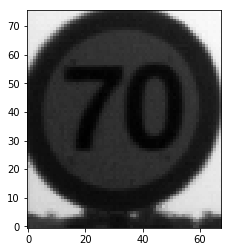

In [198]:
import matplotlib.patches as patches
rect = df.iloc[0].currRect
rect1 = df.iloc[0].prevRect

currImage_rect=imageC.im[rect[2]:rect[3],rect[0]:rect[1]]
prevImage_rect=imageP.im[rect1[2]:rect1[3],rect1[0]:rect1[1]]

plt.imshow(prevImage_rect,cmap='gray',origin='lower')

In [199]:
Ix_c = sg.convolve2d(currImage_rect, sobel_kernel_x, "same") 
Iy_c = sg.convolve2d(currImage_rect, sobel_kernel_y, "same") 


In [200]:
print(Ix_c.shape)

(86, 85)


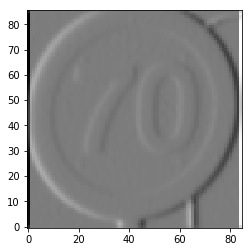

In [201]:
plt.imshow(Ix_c,cmap='gray',origin='lower')

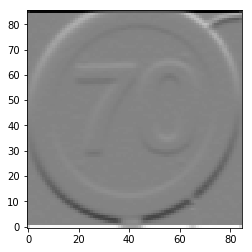

In [202]:
plt.imshow(Iy_c,cmap='gray',origin='lower')

In [203]:
Ix_p = sg.convolve2d(prevImage_rect, sobel_kernel_x, "same") 
Iy_p = sg.convolve2d(prevImage_rect, sobel_kernel_y, "same") 

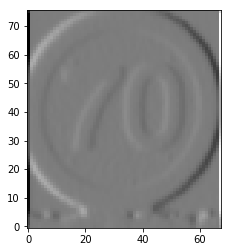

In [204]:
plt.imshow(Ix_p,cmap='gray',origin='lower')

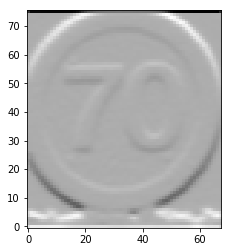

In [205]:
plt.imshow(Iy_p,cmap='gray',origin='lower')

## step 2

In [206]:
Ix2_c = Ix_c ** 2
Iy2_c = Iy_c ** 2
Ixy_c = Ix_c * Iy_c

In [207]:
print(Ix2_c.shape)

(86, 85)


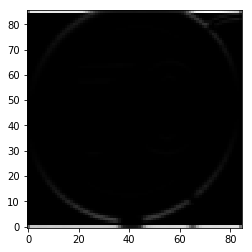

In [208]:
plt.imshow(Iy2_c,cmap='gray',origin='lower')

In [209]:
Ix2_p = Ix_p ** 2
Iy2_p = Iy_p ** 2
Ixy_p = Ix_p ** Iy_p

c:\users\hodaya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\hodaya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


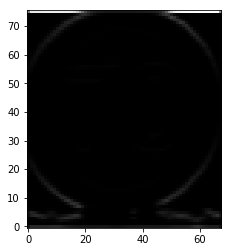

In [210]:
plt.imshow(Iy2_p,cmap='gray',origin='lower')

## step 3

In [212]:
patch = np.ones((7,7), dtype=int)

In [213]:
SIx2_c = sg.convolve2d(Ix2_c, patch, "same") 
SIy2_c = sg.convolve2d(Iy2_c, patch, "same") 
SIxy_c = sg.convolve2d(Ixy_c, patch, "same") 

In [214]:
print(SIx2_c.shape)

(86, 85)


In [215]:
SIx2_p = sg.convolve2d(Ix2_p, patch, "same") 
SIy2_p = sg.convolve2d(Iy2_p, patch, "same") 
SIxy_p = sg.convolve2d(Ixy_p, patch, "same") 

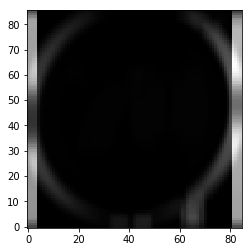

In [216]:
plt.imshow(SIx2_c,cmap='gray',origin='lower')

## step 4

In [217]:
r_mat_c = np.ones((currImage_rect.shape[0],currImage_rect.shape[1]), dtype=int)
r_mat_c
print(r_mat_c.shape)

(86, 85)


In [218]:
r_mat_p = np.ones((prevImage_rect.shape[0],prevImage_rect.shape[1]), dtype=int)
r_mat_p

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [219]:
k = 0.04;

In [231]:
 for x in range (currImage_rect.shape[0]):
 
     for y in range (currImage_rect.shape[1]):
                        
            matrix = np.array([[SIx2_c[x][y], SIxy_c[x][y]], [SIxy_c[x][y], SIy2_c[x][y]]])
            r_mat_c[x][y] = np.linalg.det(matrix) - k * np.trace(matrix)**2
print(r_mat_c.shape)

(86, 85)


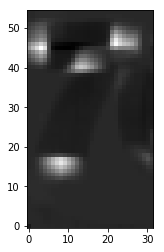

In [232]:
plt.imshow(r_mat_c[15:70, 18:50],cmap='gray',origin='lower')

In [233]:
threshold = maximum_filter(r_mat_c, 5)


In [234]:
row = currImage_rect.shape[0]
col = currImage_rect.shape[1]

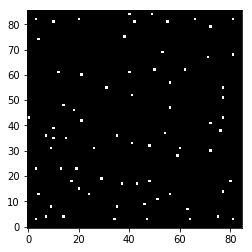

In [236]:
mask = np.zeros((currImage_rect.shape[0],currImage_rect.shape[1]), dtype=int)

mask[r_mat_c == threshold] = 1

plt.imshow(mask, cmap='gray', origin='lower')

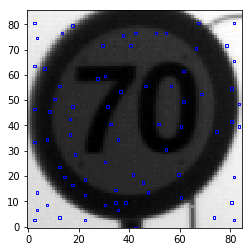

In [238]:

plt.imshow(currImage_rect,cmap='gray',origin='lower')
for x in range(currImage_rect.shape[0]):
    for y in range(currImage_rect.shape[1]):
        if mask[x][y]:
            rect = patches.Rectangle((x-1,y-1),1,1,linewidth=1,edgecolor='b',facecolor='none')
            gca().add_patch(rect)